In [3]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [3]:
years = list(range(1991,2022))

In [4]:
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [5]:
for year in years:
    url = team_stats_url.format(year)
    
    data = requests.get(url)
    
    with open("team/{}.html".format(year), "w+",encoding="utf-8") as f:
        f.write(data.text)

In [6]:
dfs = []
year = 2020
with open("team/{}.html".format(year),encoding="utf-8") as f:
    page = f.read()
    
soup = BeautifulSoup(page, 'html.parser')
tHeads = soup.find('tr', class_="thead")
soup.find('tr', class_="thead").decompose()
soup.find('tr', class_="thead").decompose()
soup.find('tr', class_="thead").decompose()
soup.find('tr', class_="thead").decompose()
soup.find('tr', class_="thead").decompose()
soup.find('tr', class_="thead").decompose()
e_table = soup.find_all(id="divs_standings_E")[0]
e_df = pd.read_html(str(e_table))[0]
e_df["Year"] = year
e_df["Team"] = e_df["Eastern Conference"]
del e_df["Eastern Conference"]
dfs.append(e_df)
    
w_table = soup.find_all(id="divs_standings_W")[0]
w_df = pd.read_html(str(w_table))[0]
w_df["Year"] = year
w_df["Team"] = w_df["Western Conference"]
del w_df["Western Conference"]
dfs.append(w_df)

In [4]:
teams = pd.concat(dfs)

NameError: name 'dfs' is not defined

In [5]:
teams.to_csv("teams.csv")

NameError: name 'teams' is not defined

In [1]:
teams

NameError: name 'teams' is not defined

In [9]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

In [4]:
teams = pd.read_csv("teams.csv")

In [5]:
del teams["GB"]

In [6]:
del teams["Year"]

In [7]:
del teams["Unnamed: 0"]

In [8]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

In [10]:
teams.to_csv("teams_df.csv")

In [11]:
teams

,W,L,W/L%,PS/G,PA/G,SRS,Team
0,53,19,0.736,112.8,106.5,5.97,Toronto Raptors
1,48,24,0.667,113.7,107.3,5.83,Boston Celtics
2,43,30,0.589,110.7,108.4,2.25,Philadelphia 76ers
3,35,37,0.486,111.8,112.3,-1.01,Brooklyn Nets
4,21,45,0.318,105.8,112.3,-6.72,New York Knicks
5,56,17,0.767,118.7,108.6,9.41,Milwaukee Bucks
6,45,28,0.616,109.4,107.5,1.63,Indiana Pacers
7,22,43,0.338,106.8,109.9,-4.00,Chicago Bulls
8,20,46,0.303,107.2,110.8,-4.38,Detroit Pistons
9,19,46,0.292,106.9,114.8,-7.77,Cleveland Cavaliers


In [22]:
!pip install mysql-connector-python

  Using cached mysql_connector_python-8.0.31-cp38-cp38-win_amd64.whl (7.9 MB)
  Using cached protobuf-3.20.1-cp38-cp38-win_amd64.whl (904 kB)


In [25]:
pip uninstall mysql-connector

^C
Note: you may need to restart the kernel to use updated packages.


In [9]:
import mysql.connector
NBA_sql = mysql.connector.connect(host = 'localhost', user = 'root',passwd = '@Lamborgini1998', database = 'NBA_WS', auth_plugin='mysql_native_password')
mycursor = NBA_sql.cursor()

In [10]:
for i,row in teams.iterrows():   
    sql = "INSERT INTO NBA_WS.TEAM values (%s,%s,%s,%s,%s,%s,%s)"
    mycursor.execute(sql,tuple(row))
    print("Record inserted")
    NBA_sql.commit()

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted


In [12]:
import matplotlib.pyplot as plt

In [14]:
teams_df_vis = pd.read_csv("teams_df_vis.csv")

In [15]:
teams_df_vis

,Unnamed: 0,W,L,W/L%,PS/G,PA/G,SRS,Team
0,0,53,19,0.736,112.8,106.5,5.97,Toronto Raptors
1,1,48,24,0.667,113.7,107.3,5.83,Boston Celtics
2,2,43,30,0.589,110.7,108.4,2.25,Philadelphia 76ers
3,3,35,37,0.486,111.8,112.3,-1.01,Brooklyn Nets
4,4,21,45,0.318,105.8,112.3,-6.72,New York Knicks
5,5,56,17,0.767,118.7,108.6,9.41,Milwaukee Bucks
6,6,45,28,0.616,109.4,107.5,1.63,Indiana Pacers
7,7,22,43,0.338,106.8,109.9,-4.00,Chicago Bulls
8,8,20,46,0.303,107.2,110.8,-4.38,Detroit Pistons
9,9,19,46,0.292,106.9,114.8,-7.77,Cleveland Cavaliers


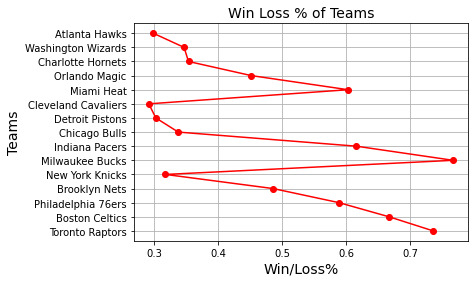

In [17]:
plt.plot(teams_df_vis['W/L%'], teams_df_vis['Team'], color='red', marker='o')
plt.title('Win Loss % of Teams', fontsize=14)
plt.xlabel('Win/Loss%', fontsize=14)
plt.ylabel('Teams', fontsize=14)
plt.grid(True)
plt.show()